## Import Packages

In [137]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import glob
from keras.utils.np_utils import to_categorical

from PIL import Image, ImageFile
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

## Load trained models

In [2]:
##loading all models
model = tf.keras.models.load_model('model1.h5')
model2 = tf.keras.models.load_model('model2.h5')
model3 = tf.keras.models.load_model('model3.h5')

In [24]:
# Read in the augmented dataset
i = 0

X_data = []
Y_data = []
classes = ['Cat', 'Dog', 'Elephant', 'Horse', 'Lion']

for each_class in classes:
    files = glob.glob (r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\test\\" + str(each_class) + "\*.jpg")
    
    for myFile in files:
        img = Image.open(myFile)
        # resizes image without ratio
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)

        if img.shape == (128, 128, 3):
            # Appending array images
            X_data.append (img)
            Y_data.append (i)
        
    i += 1

In [25]:
data = np.asarray(X_data)
label = np.asarray(Y_data)

In [26]:
label

array([0, 0, 0, ..., 4, 4, 4])

In [27]:
y_cat = to_categorical(Y_data, len(classes))

In [28]:
test_datagen = ImageDataGenerator()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, y_cat, test_size=0.2)

In [30]:
X_test = X_test.astype('float32') / 255.0

In [31]:
test_datagen.fit(X_test)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)

In [145]:
y_img_batch, y_class_batch = test_generator[0] 

for i in range(1,len(test_generator)):
    testX = test_generator[i][0]
    testY = test_generator[i][1]
    y_img_batch = np.concatenate((y_img_batch, testX))
    y_class_batch = np.concatenate((y_class_batch, testY))

#Using model3 for making prediction
y_pred = np.argmax(model3.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)

In [146]:
#Using model2 for making prediction
y_pred2 = np.argmax(model2.predict(y_img_batch),-1)
y_true2 = np.argmax(y_class_batch,-1)

In [140]:
#Using model2 for making prediction
y_pred1 = np.argmax(model.predict(y_img_batch),-1)
y_true1 = np.argmax(y_class_batch,-1)

## Predictions by model 3

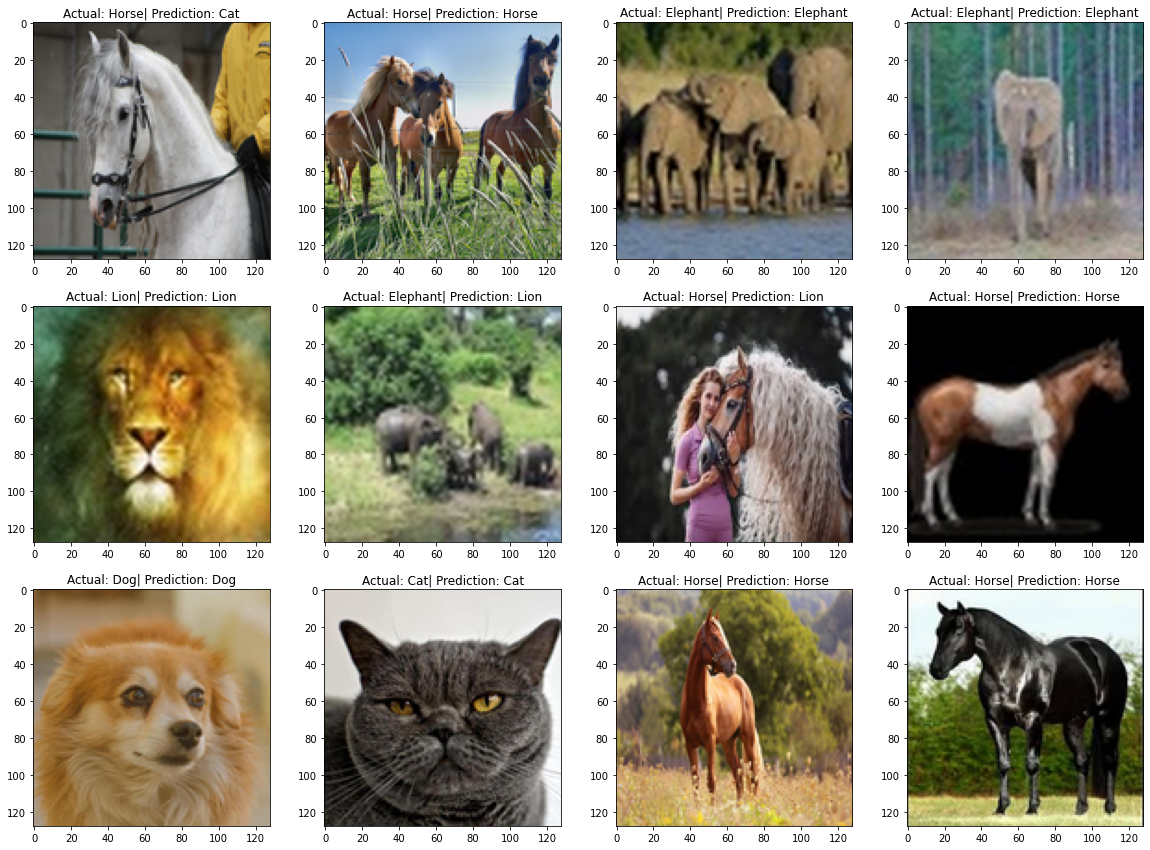

In [36]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow((y_img_batch[i]*255).astype(np.uint8))
    actual_label = classes[y_true[i]]
    predict_label = classes[y_pred[i]]
    plt.title("Actual: " + actual_label + "| Prediction: " + predict_label)

<AxesSubplot:title={'center':'Prediction of Mammals'}>

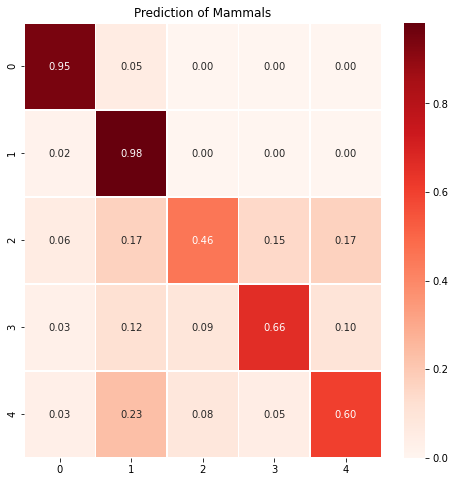

In [43]:
cm = confusion_matrix(y_true, y_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.title('Prediction of Mammals')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Reds")

In [51]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.87      0.95      0.91       110
         Dog       0.64      0.98      0.77       108
    Elephant       0.77      0.46      0.57       123
       Horse       0.77      0.66      0.71       109
        Lion       0.62      0.60      0.61        86

    accuracy                           0.73       536
   macro avg       0.73      0.73      0.71       536
weighted avg       0.74      0.73      0.72       536



## Predictions by model 2

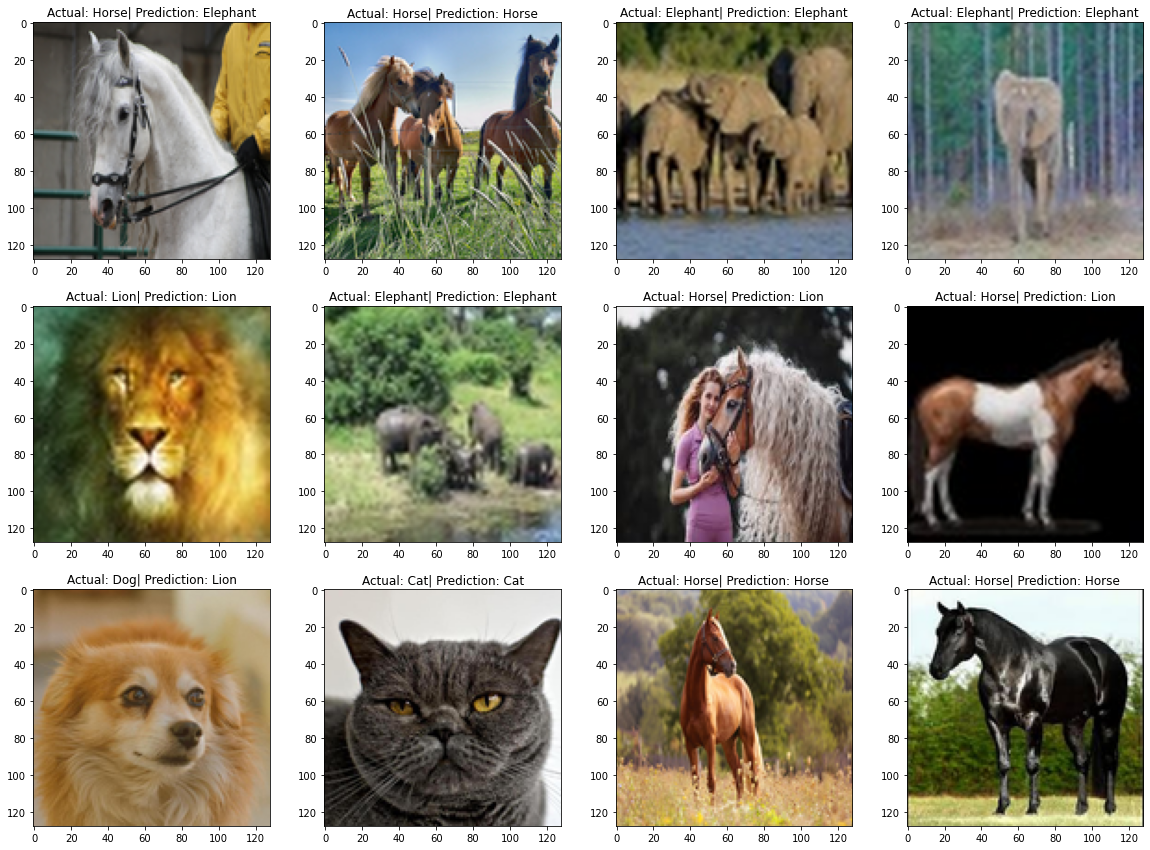

In [42]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow((y_img_batch[i]*255).astype(np.uint8))
    actual_label = classes[y_true2[i]]
    predict_label = classes[y_pred2[i]]
    plt.title("Actual: " + actual_label + "| Prediction: " + predict_label)

<AxesSubplot:title={'center':'Prediction of Mammals'}>

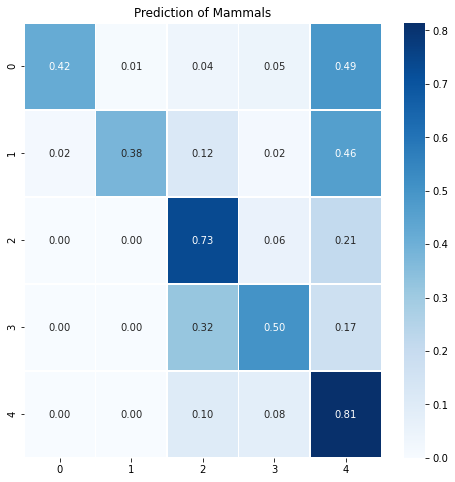

In [44]:
cm = confusion_matrix(y_true2, y_pred2) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.title('Prediction of Mammals')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues")

In [52]:
print(classification_report(y_true2, y_pred2, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.96      0.42      0.58       110
         Dog       0.98      0.38      0.55       108
    Elephant       0.60      0.73      0.66       123
       Horse       0.72      0.50      0.59       109
        Lion       0.32      0.81      0.46        86

    accuracy                           0.56       536
   macro avg       0.71      0.57      0.57       536
weighted avg       0.73      0.56      0.57       536



## Predictions by model 1

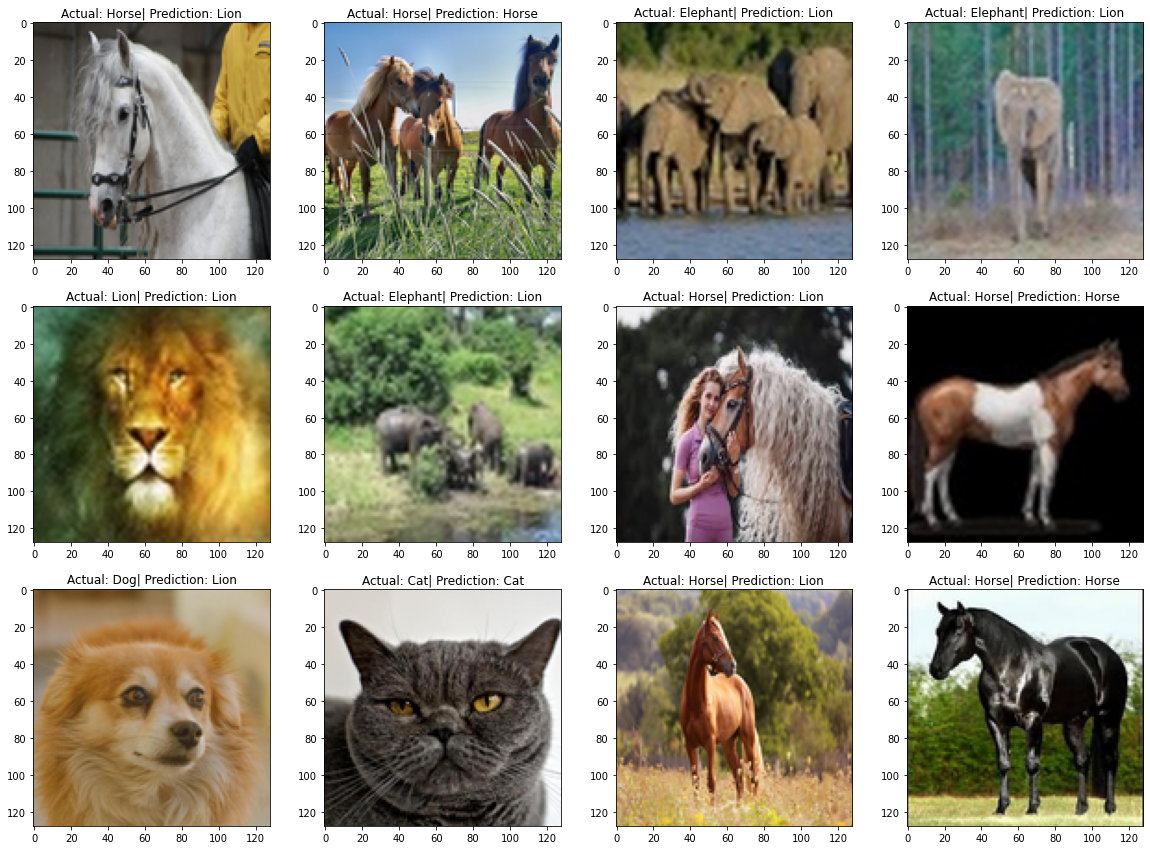

In [46]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow((y_img_batch[i]*255).astype(np.uint8))
    actual_label = classes[y_true1[i]]
    predict_label = classes[y_pred1[i]]
    plt.title("Actual: " + actual_label + "| Prediction: " + predict_label)

<AxesSubplot:title={'center':'Prediction of Mammals'}>

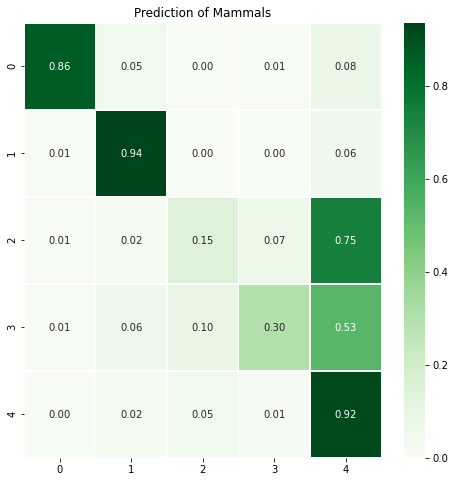

In [47]:
cm = confusion_matrix(y_true1, y_pred1) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.title('Prediction of Mammals')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Greens")

In [61]:
print(classification_report(y_true1, y_pred1, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.97      0.86      0.91       110
         Dog       0.86      0.94      0.90       108
    Elephant       0.55      0.15      0.23       123
       Horse       0.75      0.30      0.43       109
        Lion       0.32      0.92      0.48        86

    accuracy                           0.61       536
   macro avg       0.69      0.63      0.59       536
weighted avg       0.70      0.61      0.59       536



In [4]:
 (0.91+0.90+0.23+0.43+0.48)/5

0.5900000000000001

In [69]:
n_classes = len(classes)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_true)
y_pred = lb.transform(y_pred)

y_true2 = lb.transform(y_true2)
y_pred2 = lb.transform(y_pred2)

y_true1 = lb.transform(y_true1)
y_pred1 = lb.transform(y_pred1)

lw = 5

In [92]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(15,15))
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=lw)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC Curve')
    plt.legend(loc="best")
    plt.show()
        
    return roc_auc_score(y_test, y_pred, average=average)


<ipython-input-92-edb390bc60e0>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


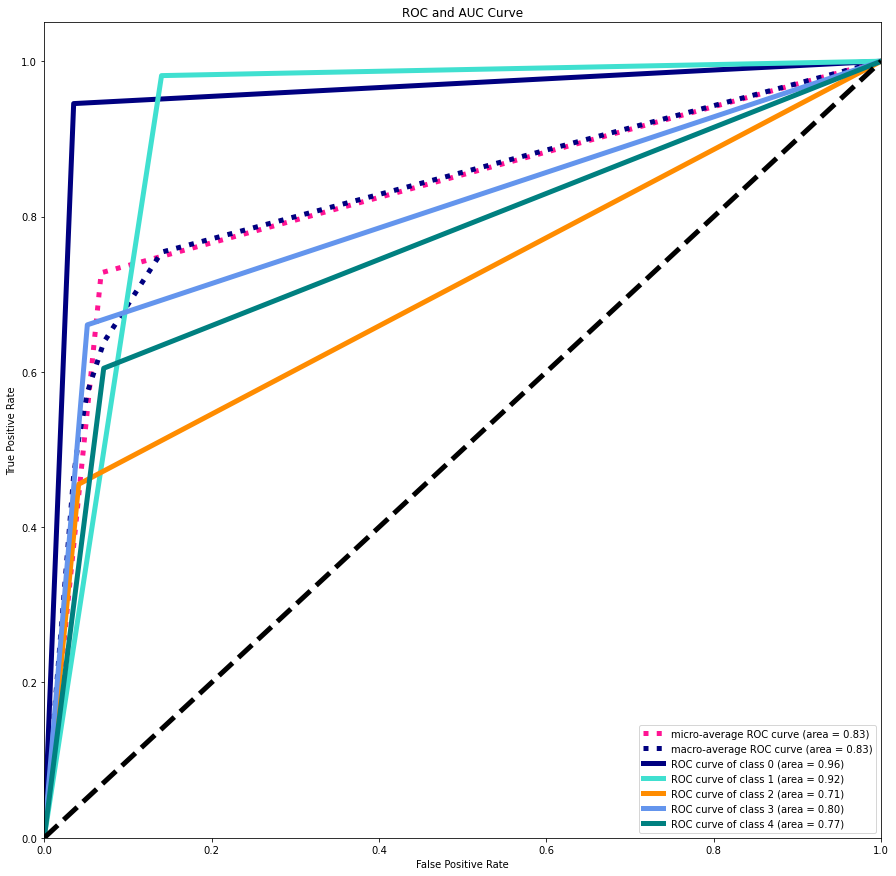

ROC_AUC_Score of Model 3: 0.8308228430836788


In [93]:
print("ROC_AUC_Score of Model 3:", multiclass_roc_auc_score(y_true, y_pred))

<ipython-input-92-edb390bc60e0>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


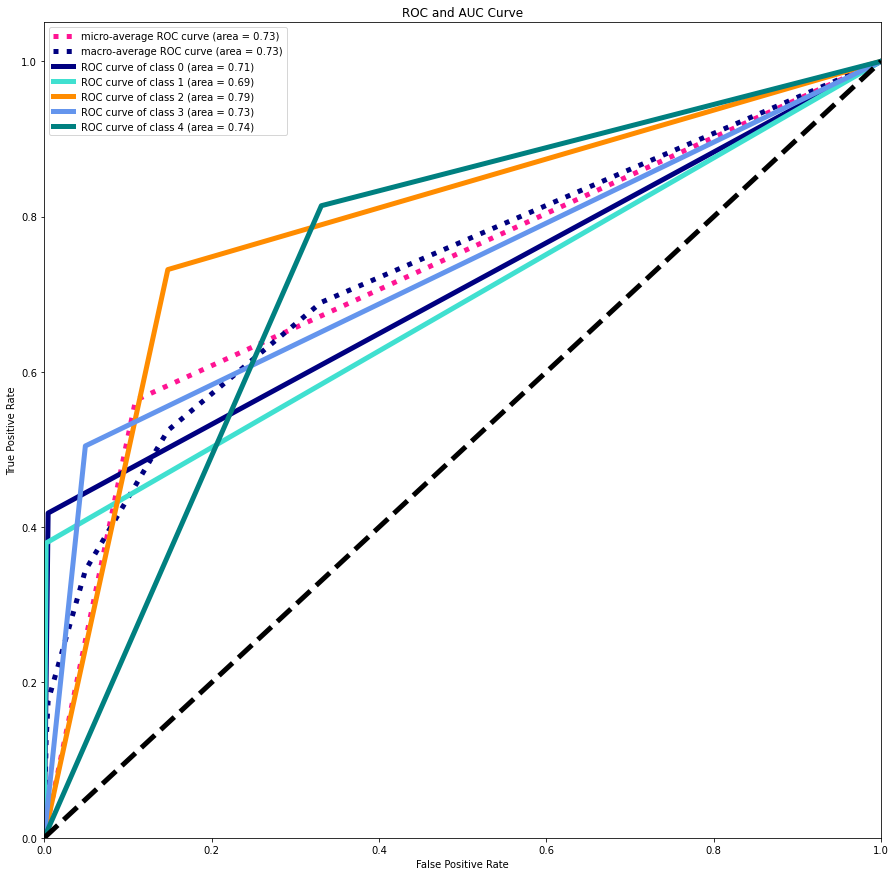

ROC_AUC_Score of Model 2: 0.7313036928091919


In [94]:
print("ROC_AUC_Score of Model 2:", multiclass_roc_auc_score(y_true2, y_pred2))

<ipython-input-92-edb390bc60e0>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


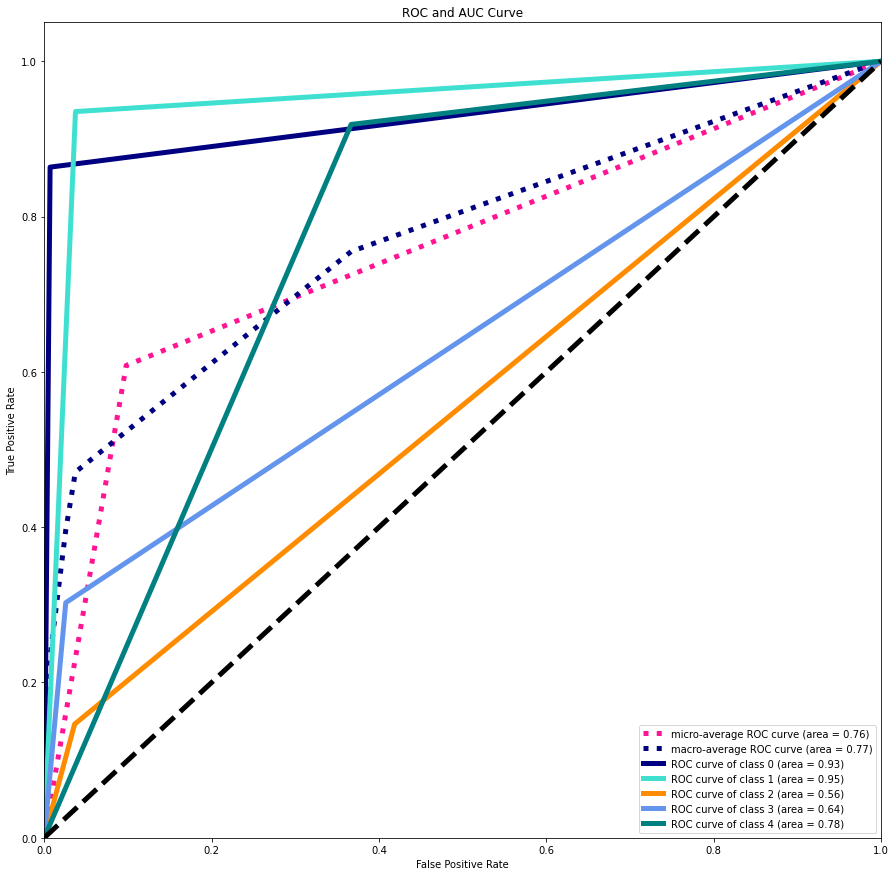

ROC_AUC_Score of Model 1: 0.769334712250649


In [95]:
print("ROC_AUC_Score of Model 1:", multiclass_roc_auc_score(y_true1, y_pred1))

In [96]:
def precision_recall(y_pred,y_true):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                            y_pred[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
        y_pred.ravel())
    average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                         average="micro")
    return precision, recall,average_precision
    
precision, recall,average_precision = precision_recall(y_true,y_pred)
print('Average precision score model 3, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

precision2, recall2,average_precision2 = precision_recall(y_true2,y_pred2)
print('Average precision score model 2, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision2["micro"]))

precision1, recall1,average_precision1 = precision_recall(y_true1,y_pred1)
print('Average precision score model 1, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision1["micro"]))

Average precision score model 3, micro-averaged over all classes: 0.58
Average precision score model 2, micro-averaged over all classes: 0.40
Average precision score model 1, micro-averaged over all classes: 0.45


In [103]:
def curve(precision, recall,average_precision):
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])

    plt.figure(figsize=(15, 15))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(lines, labels, loc="lower left", prop=dict(size=10))

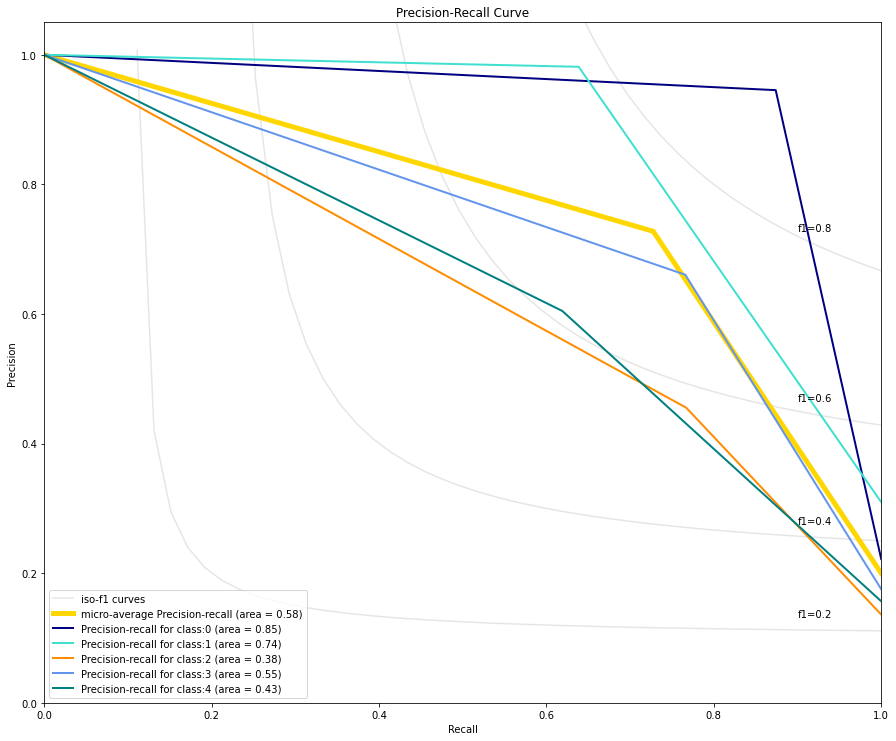

In [104]:
#Precision-Recall Curve for model 3
curve(precision, recall,average_precision)

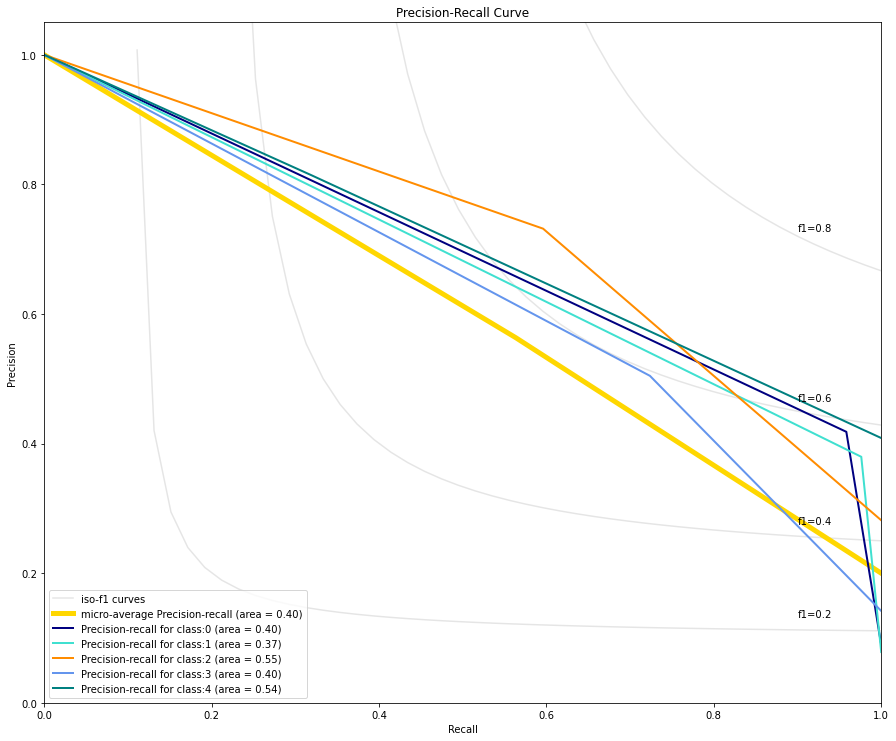

In [105]:
#Precision-Recall Curve for model 2
curve(precision2, recall2,average_precision2)

## Weigted Average Models Ensembling

In [114]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.argmax(summed, axis=1)
    return result

members = [model,model2,model3]
results = ensemble_predictions(members,X_test)

In [115]:
results

array([2, 3, 3, 2, 2, 1, 1, 3, 3, 4, 0, 0, 3, 3, 1, 2, 1, 3, 4, 3, 4, 4,
       1, 4, 4, 4, 4, 1, 0, 3, 4, 1, 2, 4, 4, 3, 2, 4, 0, 1, 1, 0, 1, 4,
       4, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 2, 4, 0, 2, 1, 2, 0, 1, 0, 4, 2,
       1, 0, 4, 4, 1, 2, 0, 0, 0, 4, 4, 4, 0, 2, 0, 1, 1, 3, 4, 2, 1, 3,
       0, 0, 4, 1, 0, 1, 4, 4, 4, 4, 4, 1, 2, 2, 4, 2, 3, 2, 0, 4, 4, 4,
       4, 4, 4, 3, 0, 0, 2, 2, 4, 3, 2, 1, 0, 1, 1, 0, 1, 0, 4, 4, 1, 4,
       1, 2, 4, 2, 4, 1, 4, 1, 4, 4, 1, 4, 0, 4, 0, 4, 4, 3, 4, 4, 2, 0,
       2, 4, 1, 4, 0, 0, 3, 3, 0, 2, 2, 3, 4, 1, 0, 3, 2, 1, 1, 3, 2, 1,
       0, 1, 4, 0, 4, 0, 1, 1, 4, 3, 3, 4, 2, 4, 3, 1, 0, 3, 4, 1, 1, 0,
       2, 0, 4, 2, 4, 2, 2, 0, 4, 4, 2, 4, 4, 4, 2, 1, 2, 0, 4, 2, 0, 4,
       1, 4, 2, 3, 0, 4, 2, 4, 1, 2, 4, 2, 1, 3, 1, 2, 1, 0, 0, 4, 1, 0,
       0, 1, 0, 4, 0, 0, 3, 2, 2, 4, 4, 4, 4, 0, 4, 1, 1, 3, 1, 4, 3, 4,
       4, 1, 2, 0, 3, 3, 0, 0, 3, 1, 0, 4, 0, 4, 1, 4, 4, 1, 4, 4, 4, 2,
       1, 1, 0, 0, 3, 4, 2, 0, 3, 1, 2, 0, 4, 2, 2,

In [142]:
y_true1

array([3, 3, 2, 2, 4, 2, 3, 3, 1, 0, 3, 3, 0, 2, 1, 1, 0, 2, 2, 3, 4, 2,
       2, 2, 4, 4, 3, 2, 1, 4, 3, 1, 2, 4, 0, 1, 3, 4, 3, 3, 2, 1, 4, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 3, 1, 3, 1, 3, 4, 4, 2, 0, 1, 4, 4, 1, 0,
       0, 0, 4, 4, 1, 3, 0, 1, 1, 2, 1, 3, 2, 2, 2, 2, 0, 4, 2, 0, 1, 0,
       1, 3, 3, 2, 2, 4, 4, 4, 4, 3, 0, 1, 2, 0, 2, 2, 2, 0, 0, 4, 0, 1,
       1, 0, 0, 1, 2, 3, 3, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 4, 1,
       0, 1, 0, 1, 2, 2, 1, 4, 0, 3, 0, 0, 2, 3, 3, 3, 1, 3, 0, 4, 2, 1,
       2, 0, 4, 4, 0, 1, 3, 1, 0, 0, 3, 4, 2, 0, 0, 0, 0, 4, 4, 2, 1, 0,
       4, 2, 1, 2, 0, 0, 2, 3, 1, 2, 1, 2, 1, 0, 4, 1, 4, 4, 1, 0, 1, 4,
       3, 1, 1, 1, 4, 3, 0, 4, 0, 4, 1, 3, 4, 2, 3, 3, 3, 0, 3, 2, 3, 4,
       3, 1, 1, 0, 0, 4, 3, 3, 2, 4, 0, 0, 0, 4, 4, 3, 3, 0, 1, 4, 2, 2,
       3, 3, 3, 1, 2, 2, 1, 2, 0, 1, 4, 2, 0, 4, 2, 4, 2, 4, 3, 2, 4, 2,
       3, 2, 1, 1, 3, 1, 3, 4, 3, 4, 0, 3, 0, 0, 3, 3, 2, 3, 4, 1, 3, 0,
       1, 2, 0, 0, 4, 2, 0, 2, 1, 3, 3, 2, 1, 4, 2,

In [147]:
confusion_matrix(y_true1, results)

array([[21, 23, 19, 11, 36],
       [22, 16, 24, 17, 29],
       [22, 35, 18, 16, 32],
       [22, 22, 20, 13, 32],
       [13, 22,  8, 17, 26]], dtype=int64)

In [148]:
print(classification_report(y_true1, results, target_names=classes))
#Hence in this case ensemble learning doesnt work well

              precision    recall  f1-score   support

         Cat       0.21      0.19      0.20       110
         Dog       0.14      0.15      0.14       108
    Elephant       0.20      0.15      0.17       123
       Horse       0.18      0.12      0.14       109
        Lion       0.17      0.30      0.22        86

    accuracy                           0.18       536
   macro avg       0.18      0.18      0.17       536
weighted avg       0.18      0.18      0.17       536

